### Accessing Text Corpora

In [2]:
import nltk

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [5]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

In [8]:
# short program to display other information about each text  
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


### Web and Chat Text

In [9]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [10]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

### Stylistics  

Studying systematic differences between genres

In [11]:
from nltk.corpus import brown 

news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can','could','may','might','must','will']

for m in modals:
    print(m + ':', fdist[m])

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


In [13]:
cfd = nltk.ConditionalFreqDist((genre,word) for genre in brown.categories() for word in brown.words(categories=genre))

In [14]:
genres = ['news','religion','hobbies','science_fiction','romance','humor']
modals = ['can','could','may','might','must','will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


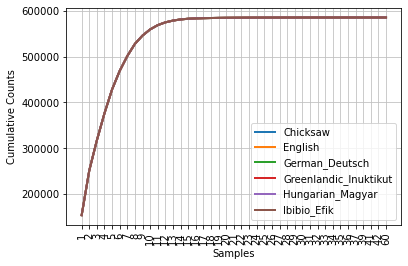

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [20]:
from nltk.corpus import udhr

languages = ['Chicksaw','English','German_Deutsch', 'Greenlandic_Inuktikut','Hungarian_Magyar','Ibibio_Efik']

cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words())
cfd.plot(cumulative=True);

### Loading Your Own Corpus

In [22]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/Users/joshiden/Documents/Classes/CUNY SPS/Spring 2023/DATA620'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['.DS_Store',
 '.ipynb_checkpoints/NLP_CH1-checkpoint.ipynb',
 '.ipynb_checkpoints/NLP_CH2-checkpoint.ipynb',
 "Books/Loper, Edward_Bird, Steven_Klein, Ewan - Natural Language Processing with Python (2009, O'Reilly Media) - libgen.li.epub",
 "Books/Maksim Tsvetovat, Alexander Kouznetsov - Social Network Analysis for Startups_ Finding connections on the social web (2011, O'Reilly Media) - libgen.li.epub",
 'DATA 620_Syllabus_AL SP23.docx',
 'DATA 620_Syllabus_AL SP23.pdf',
 'DATA 620_Syllabus_AL SP23.txt',
 'NLP_CH1.ipynb',
 'NLP_CH2.ipynb',
 'nlp_c1.py']

In [24]:
wordlists.words('NLP_CH1.ipynb')

['{', '"', 'cells', '":', '[', '{', '"', 'cell_type', ...]

### Conditional Frequency Distributions  

In [25]:
genre_word = [(genre, word) for genre in ['news','romance'] for word in brown.words(categories=genre)]
len(genre_word)

170576

In [26]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['news', 'romance']

In [27]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [28]:
cfd['romance']

FreqDist({',': 3899, '.': 3736, 'the': 2758, 'and': 1776, 'to': 1502, 'a': 1335, 'of': 1186, '``': 1045, "''": 1044, 'was': 993, ...})

In [29]:
cfd['romance']['could']

193

### Plotting and Tabulating Distributions  

KeyboardInterrupt: 

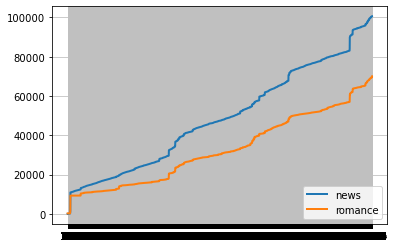

In [38]:
cfd.plot(cumulative=True);